# Laboratorio I -  Series Temporales

Basado en *Tutorial01 Time Stamped.ipynb & Tutorial02 Forecasting.ipynb* @ https://github.com/gmiretti/forecasting/

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from scipy import stats
from pandas.plotting import lag_plot
# @ https://github.com/gmiretti/forecasting/
from plotting import fanchart

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

## Data: Minutos Pre/Pos-pago salientes

Analizamos el conjunto de datos *Telefonia_movil.csv*.

In [3]:
# Leemos el set de datos sin ningun modificador, para ver que levanta pandas
# csv @  https://github.com/gmiretti/forecasting/datasets
min_csv=pd.read_csv('datasets/Telefonia_movil.csv')
min_csv.head(3)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013


In [4]:
# Tenemos '.' como separador de miles - efectuamos la lectura nuevamente
min_csv=pd.read_csv('datasets/Telefonia_movil.csv',thousands='.')
min_csv.head(3)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943,6582117,15368060,Ene-Mar 2013
1,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2,2013,3,10315484,7335154,17650638,Jul-Sept 2013


In [5]:
#Armamos el formato para date - hint:gmiretti
min_csv.index=pd.PeriodIndex(min_csv['Año'].astype(str)+'Q' +min_csv['Trimestre'].astype(str),freq='Q')
# Veamos el resultado - deberiamos obtener el indice en formato quarterly
min_csv

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
2013Q1,2013,1,8785943,6582117,15368060,Ene-Mar 2013
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2013Q3,2013,3,10315484,7335154,17650638,Jul-Sept 2013
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013
2014Q1,2014,1,10128751,5799223,15927974,Ene-Mar 2013
2014Q2,2014,2,10821463,6438071,17259534,Abr-Jun 2014
2014Q3,2014,3,11524344,7179152,18703495,Jul-Sept 2014
2014Q4,2014,4,11997330,7147630,19144961,Oct-Dic 2014
2015Q1,2015,1,10273637,6480172,16753809,Ene-Mar 2015
2015Q2,2015,2,11226576,6579819,17806395,Abr-Jun 2015


#### Exploremos un poco los datos
Graficamos los diferentes casos

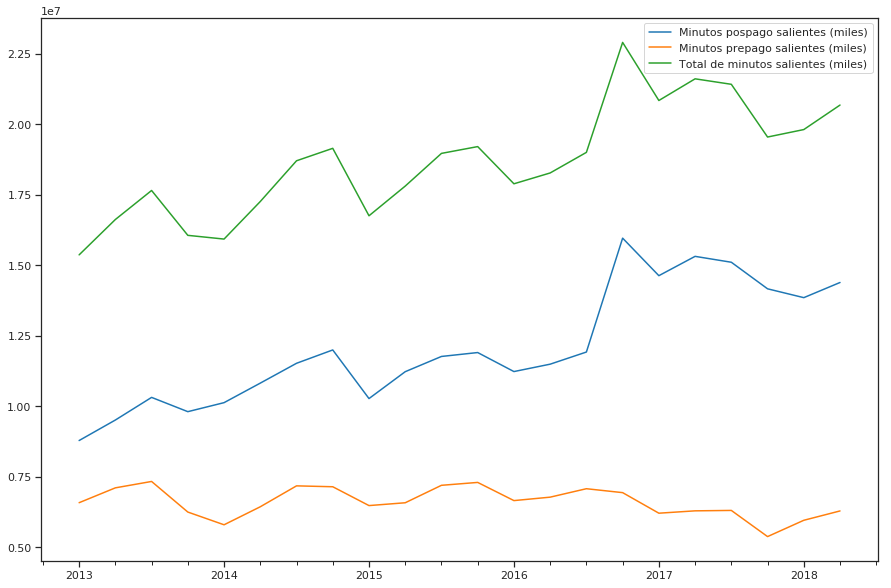

In [6]:
mpos='Minutos pospago salientes (miles)'
mpre='Minutos prepago salientes (miles)'
mtot='Total de minutos salientes (miles)'
min_csv[[mpos,mpre,mtot]].plot()

Vemos que el total de minutos parece copiar el comportamiento de *Minutos pospago salientes*. Ahora veamos algunos boxplot.

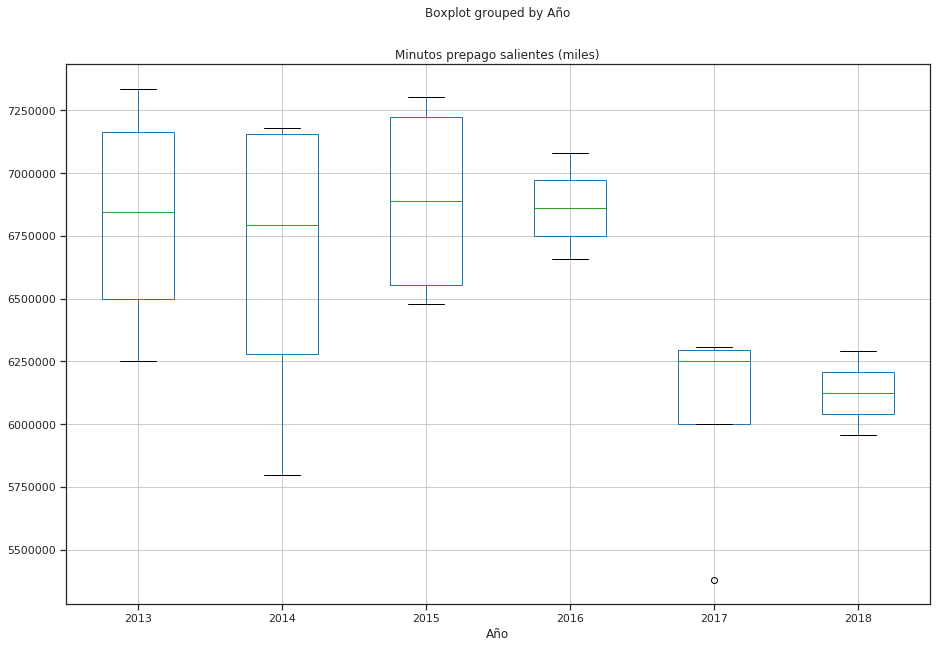

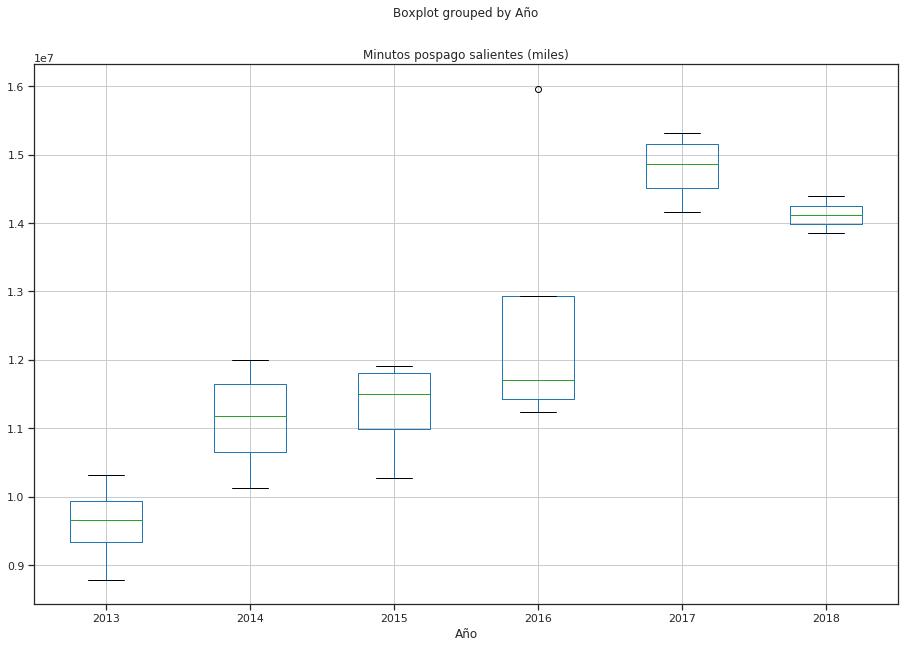

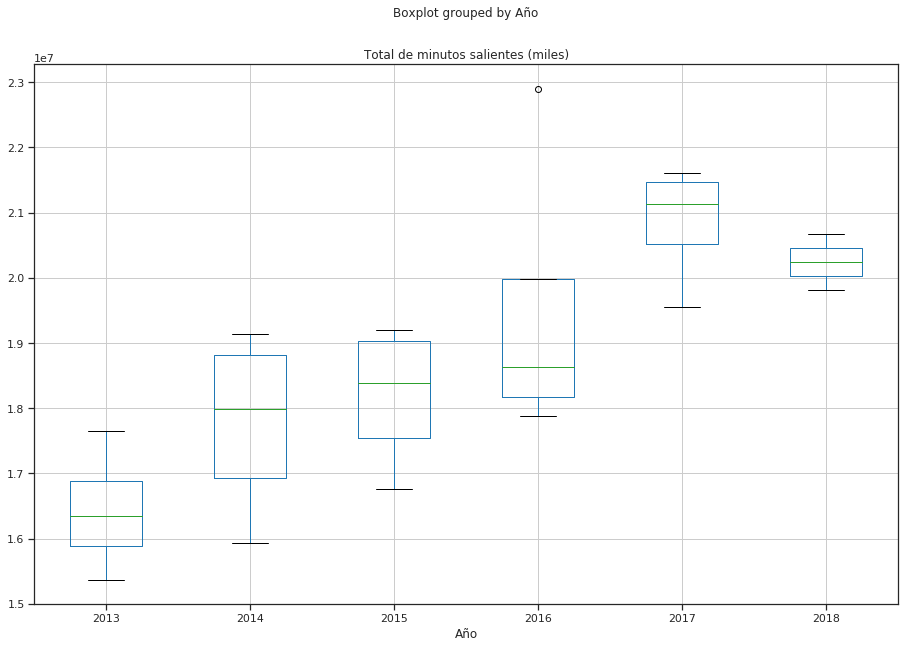

In [7]:
min_csv.boxplot(column=mpre,by='Año');
min_csv.boxplot(column=mpos,by='Año');
min_csv.boxplot(column=mtot,by='Año');

Se observa un cambio en el comportamiento entre 2016 y 2017. Ahora veamos los correspondientes por trimestre.

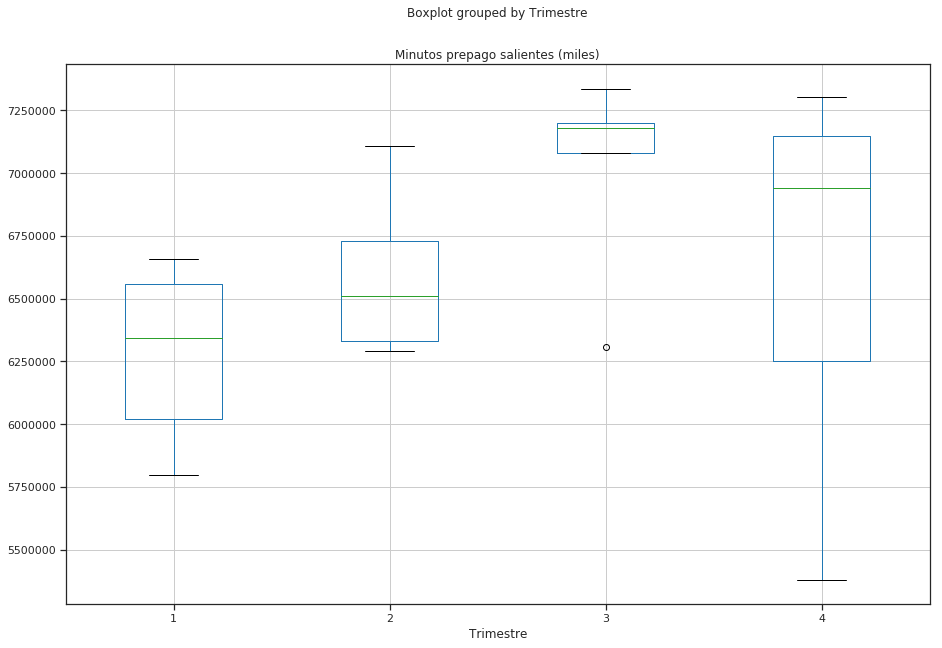

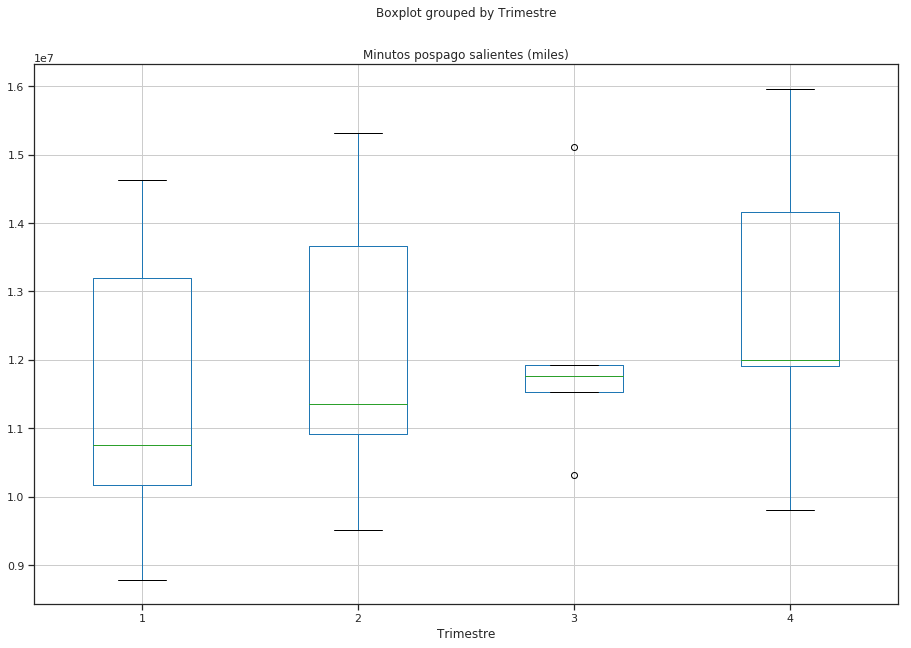

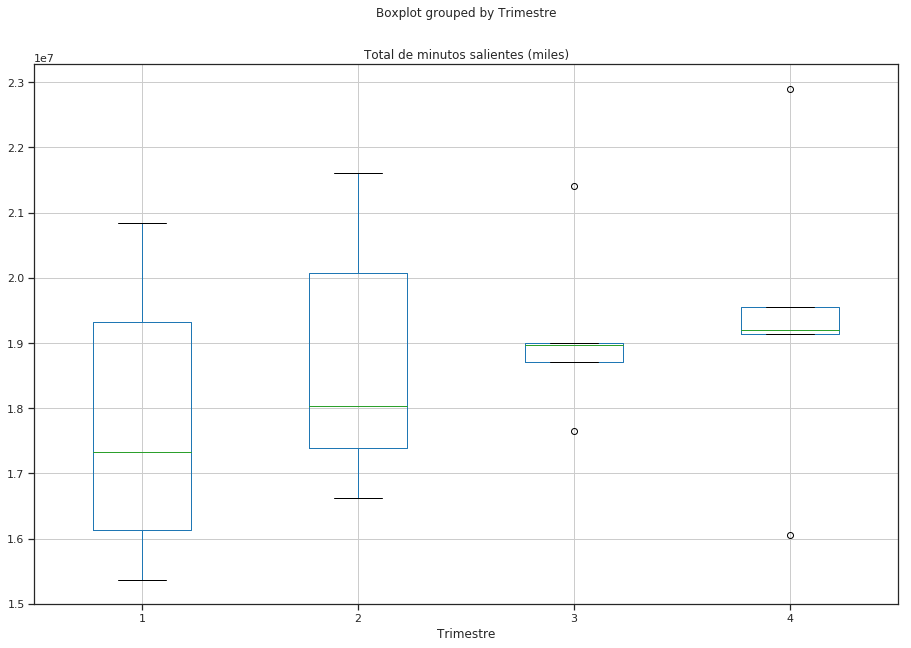

In [8]:
min_csv.boxplot(column=mpre,by='Trimestre');
min_csv.boxplot(column=mpos,by='Trimestre');
min_csv.boxplot(column=mtot,by='Trimestre');

#### Veamos si observamos algun comportamiento estacional

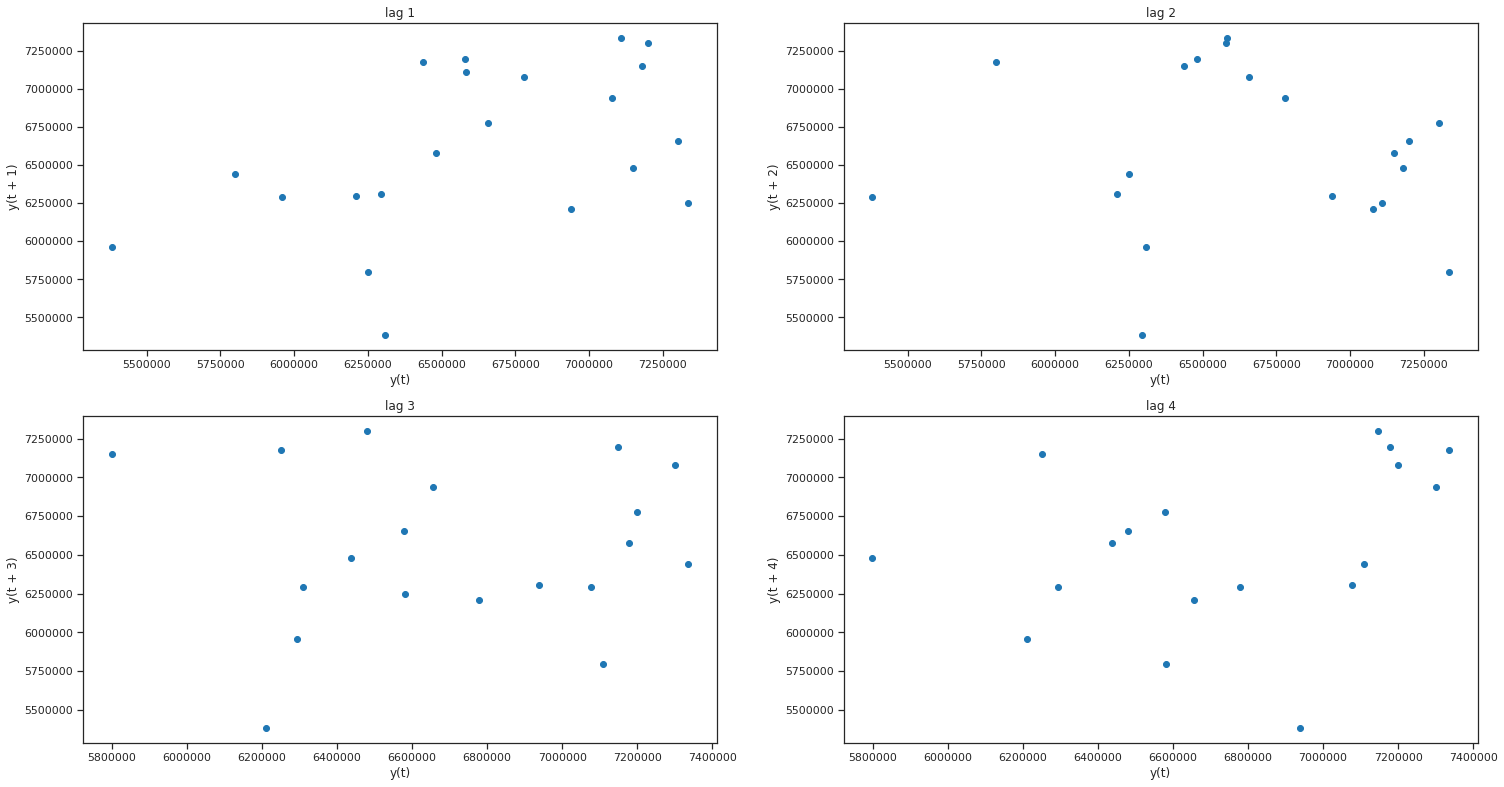

In [9]:
plt.rcParams['figure.figsize'] = [25, 100]
for i in range(4):
   plt.subplot(14,2,i+1)
   plt.title("lag " + str(i+1))
   lag_plot(min_csv[mpre],lag=i+1);

A simple vista no se observa una tendencia clara.

#### Veamos **mpos**

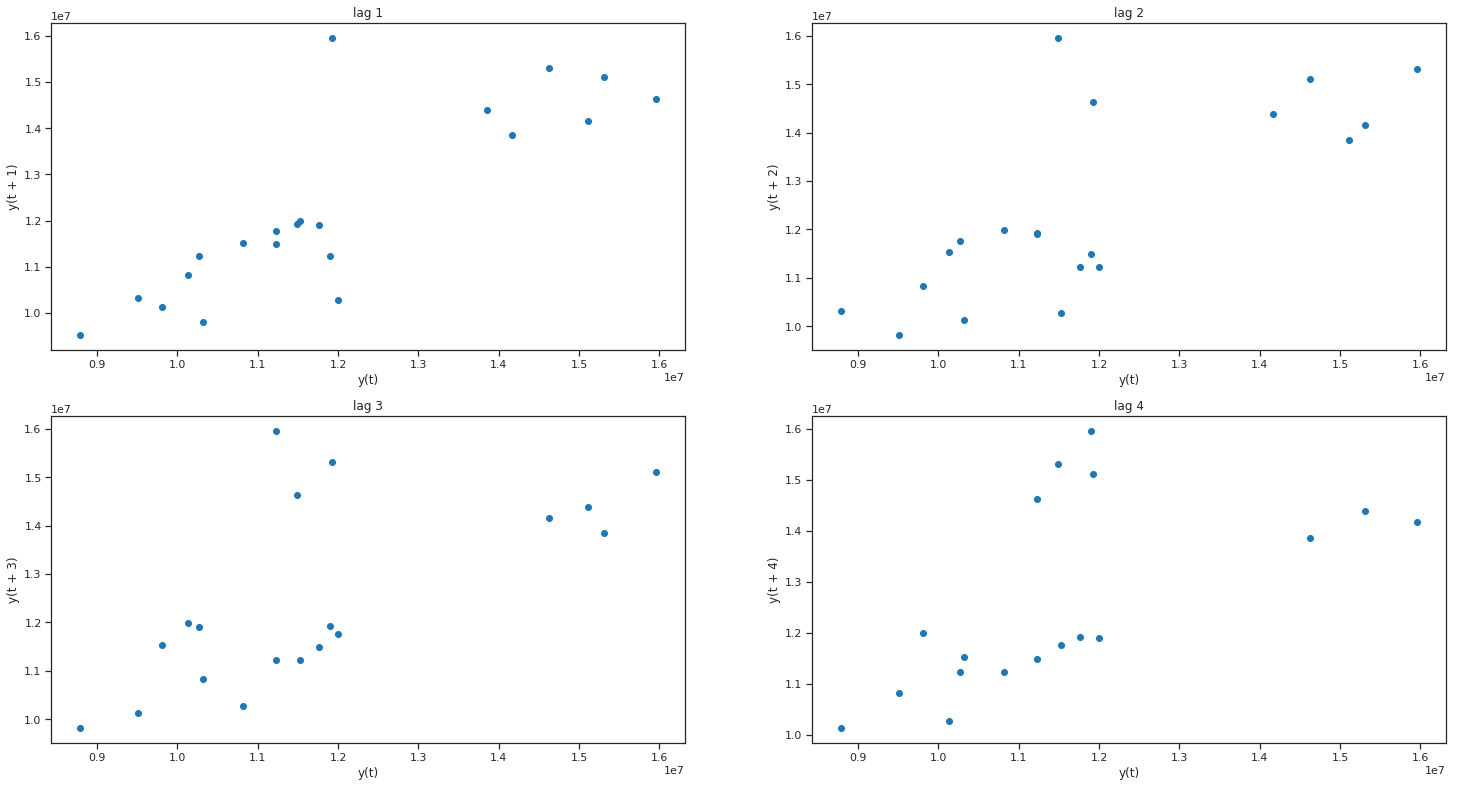

In [10]:
plt.rcParams['figure.figsize'] = [25, 100]
for i in range(4):
   plt.subplot(14,2,i+1)
   plt.title("lag " + str(i+1))
   lag_plot(min_csv[mpos],lag=i+1);

En esta instancia parece haber cierto patron para lag=1 (en general se observa para lag==[1,2,3,4], pero con menor dispersion para lag==1).

## Exploratory data analysis - MPRE

Continuamos el analisis con **mpre**.

In [11]:
y=min_csv[mpre]
y.index

PeriodIndex(['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

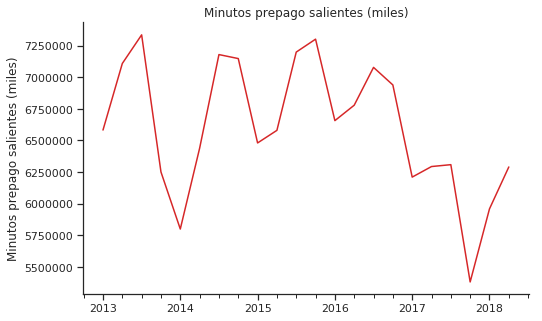

In [12]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel(mpre)
ax.set_title(mpre)
sns.despine()
plt.show()

### Enfoque: Random walk
Vemos naive para h periodos (filminas Series Temporales ~33)

In [13]:
h = 5
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2018Q3    6290155
2018Q4    6290155
2019Q1    6290155
2019Q2    6290155
2019Q3    6290155
Freq: Q-DEC, dtype: int64

Calculamos la desviacion estandar

In [14]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

542855.357

Y los intervalos de predicción

In [15]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2018Q3,5226178.052,7354131.948
2018Q4,4785464.370,7794845.630
2019Q1,4447292.868,8133017.132
2019Q2,4162201.104,8418108.896
2019Q3,3911030.218,8669279.782


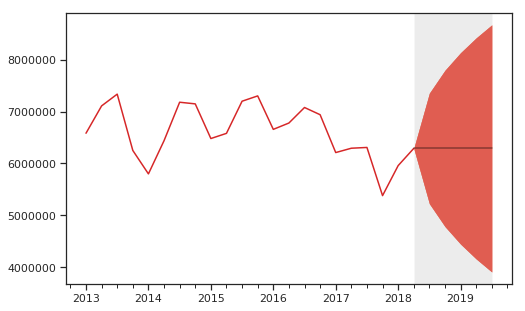

In [16]:
#
point_pred = (intv[0]+intv[1])/2
fig, ax = fanchart(y['2013':],point_pred,intv,intv,intv)
plt.show()

Vemos que los intervalos de confidencia son bastante grandes :-P

### Enfoque: Simple exponential smoothing

In [17]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
alpha_ses = model_ses.model.params['smoothing_level']
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
# https://en.wikipedia.org/wiki/Akaike_information_criterion
aic_ses = model_ses.aic
# https://en.wikipedia.org/wiki/Bayesian_information_criterion
bic_ses = model_ses.bic
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_ses))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))


 Smoothing parameter: alpha  0.368
 In-sample fit:
 MSE               252604920036.272
 AIC               581.612
 BIC               583.794


El valor de $\alpha$ parece indicar que se le esta dando consideracion a mas valores del pasado

"Also AIC and BIC looks off so we are continue our analysis with MSE. Also they are fixed in 0.10. In the case you need them, you can calculate them as it follows"

In [18]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -320.023
 AIC               646.045
 BIC               649.318


Veamos el ajuste

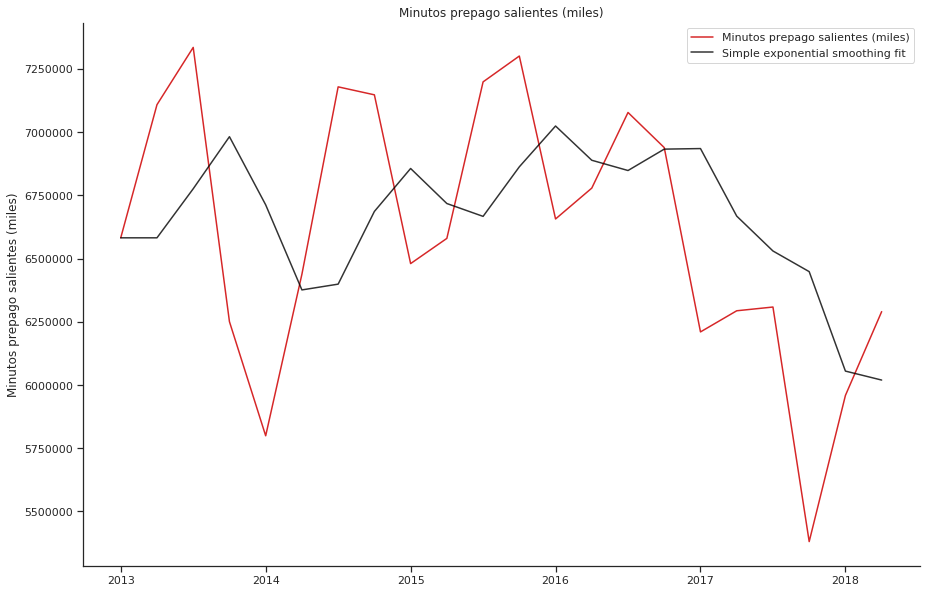

In [19]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color=red, label=mpre)
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel(mpre)
ax.set_title(mpre)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

Veamos que pasa si cambiamos el *smoothing parameter*

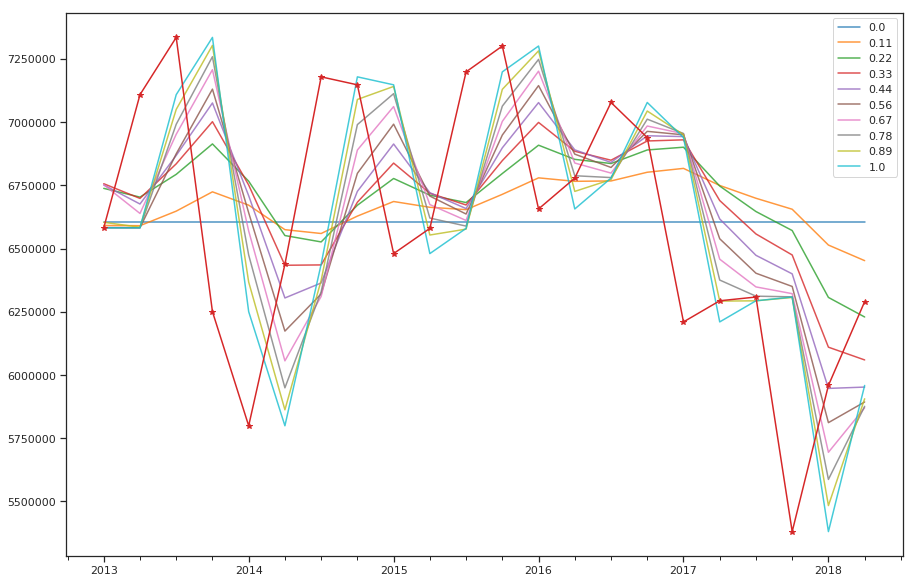

In [20]:
fig, ax= plt.subplots(figsize=(15,10))
for alpha in np.linspace(0,1,10):
    
    model_ses = sm.tsa.SimpleExpSmoothing(y).fit(smoothing_level=alpha)
    fitted_ses = model_ses.fittedvalues
    fitted_ses.plot(label='Simple exponential smoothing fit', alpha=0.8)
y.plot(color=red, label=mpre,marker='*')
ax.legend(np.round(np.linspace(0,1,10),2))

In [21]:
# Volvamos al original
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues

## Analisis de residuos

Para el caso de exponential smoothing.

In [22]:
resid=y-fitted_ses # model_ses.resid isn't a panda.Series, so no index, no plot

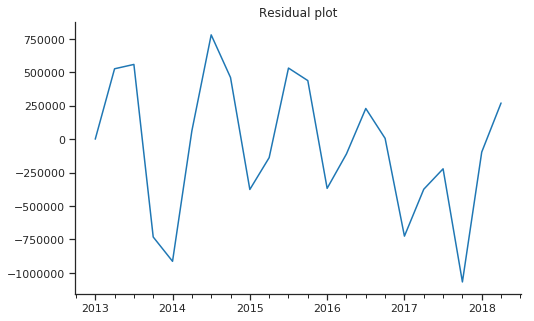

In [23]:
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_title('Residual plot')
sns.despine()
plt.show()

Los residuos parecen tener un comportamiento ciclico. Segun lo aprendido, existe un comportamiento que el modelo **no esta capturando** (le estamos errando en forma ciclica).

Veamos la autocorrelacion de los residuos (ACF plot)

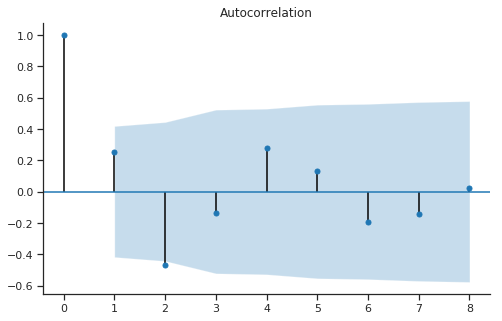

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=8, ax=ax)
sns.despine()
plt.show()

Veamos la distribución de los mismos

/home/felix/anaconda3/envs/series_temporales/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


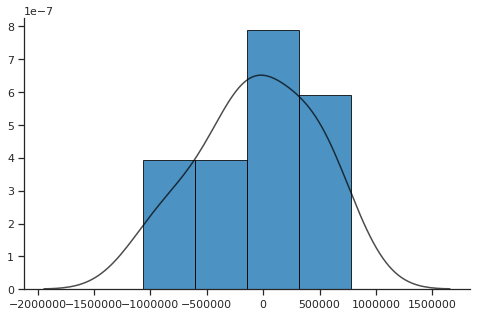

In [25]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

Esto no parece ser **normalmente distribuido**. Quizas nos estan faltando mas mediciones!!

## Validacion del Modelo: Forecasting
Comparamos random walk y simple exponential smoothing methods. 

In [26]:
min_csv.index

PeriodIndex(['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [27]:
# Veamos la cantidad de samples y nos quedamos con una fraccion
print('Cantidad de Samples: {}'.format(min_csv.index.shape[0]))
frac=0.3
quarter= str(min_csv.index[-int(22*frac)])
print('Validation Set Start @: {} (para una fraccion {})'.format(quarter,frac))

Cantidad de Samples: 22
Validation Set Start @: 2017Q1 (para una fraccion 0.3)


In [28]:
# Real time forecasting - use it as a template - expanding window

validation=y[quarter:].index
start = y.index.get_loc(quarter) 

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

,RW,SES,Actual
2017Q2,6209983.0,6.768569e+06,6293563.0
2017Q3,6293563.0,6.741949e+06,6308373.0
2017Q4,6308373.0,6.719211e+06,5380710.0
2018Q1,5380710.0,6.652596e+06,5958717.0
2018Q2,5958717.0,5.966280e+06,6290155.0


Veamos cual de las predicciones es mas precisa

In [29]:
table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,554228.467,243096.132
SES,723818.298,218005.976


## Forecast

Expanding and rolling point forecast. 

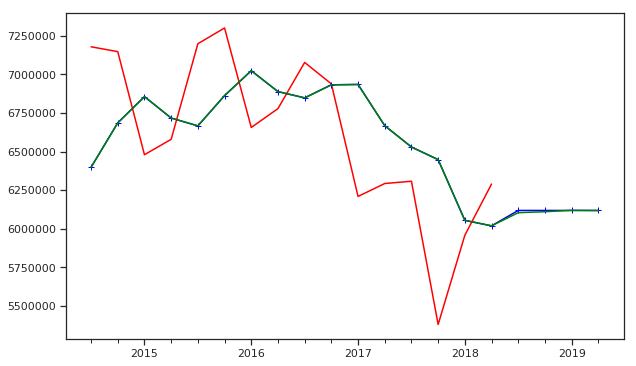

In [30]:
h=4
w=h*4
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red',figsize=(10,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue',marker='+');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

Las dos predicciones parecen ser muy similares entre si.